In [1]:
import pickle
from typing import Dict, Optional

import cheetah
import matplotlib.pyplot as plt
import scienceplots
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
plt.style.use(["science", "ieee", "no-latex"])

In [3]:
with open("recorded_episode_1.pkl", "rb") as f:
    history = pickle.load(f)

In [4]:
history["observations"] = history["observations"][:50]

In [27]:
def plot_history(
    history: Dict,
    save_path: Optional[str] = None,
):
    fig, axs = plt.subplots(4, 1, figsize=(3.5, 5), sharex=True)

    axs[0].plot(
        [
            F.mse_loss(torch.tensor([obs["beam"]]), torch.tensor([obs["target"]]))
            for obs in history["observations"]
        ]
    )
    axs[0].set_ylabel("Loss")

    axs[1].plot(
        [obs["beam"][0] * 1e3 for obs in history["observations"]],
        label=r"$\mu_x$",
        c="#369F2D",
    )
    axs[1].plot(
        [obs["beam"][1] * 1e3 for obs in history["observations"]],
        label=r"$\sigma_x$",
        c="#EE4431",
    )
    axs[1].plot(
        [obs["beam"][2] * 1e3 for obs in history["observations"]],
        label=r"$\mu_y$",
        c="#1663A9",
    )
    axs[1].plot(
        [obs["beam"][3] * 1e3 for obs in history["observations"]],
        label=r"$\sigma_y$",
        c="#8E549E",
    )
    axs[1].set_ylabel("Beam\nparameter (mm)")
    axs[1].legend(ncol=2)

    axs[2].plot(
        [obs["magnets"][0] for obs in history["observations"]],
        label=r"$Q_1$",
        c="#FFD700",
    )
    axs[2].plot(
        [obs["magnets"][1] for obs in history["observations"]],
        label=r"$Q_2$",
        c="#40E0D0",
    )
    axs[2].plot(
        [obs["magnets"][3] for obs in history["observations"]],
        label=r"$Q_3$",
        c="#FF7E5F",
    )
    axs[2].set_ylabel("Quadrupole\n" + r"strength ($m^{-2}$)")
    axs[2].legend(ncol=3, loc="right", bbox_to_anchor=(1.0, 0.35))

    axs[3].plot(
        [obs["magnets"][2] * 1e3 for obs in history["observations"]],
        label=r"$C_v$",
        c="#9e9e9e",
    )
    axs[3].plot(
        [obs["magnets"][4] * 1e3 for obs in history["observations"]],
        label=r"$C_h$",
        c="#33bbee",
    )
    axs[3].set_xlabel("Iteration")
    axs[3].set_ylabel("Steering\nangle (mrad)")
    axs[3].legend(ncol=2, loc="right", bbox_to_anchor=(1.0, 0.35))

    axs[0].text(x=0.92, y=0.82, s="(a)", transform=axs[0].transAxes)
    axs[1].text(x=0.92, y=0.73, s="(b)", transform=axs[1].transAxes)
    axs[2].text(x=0.92, y=0.65, s="(c)", transform=axs[2].transAxes)
    axs[3].text(x=0.92, y=0.65, s="(d)", transform=axs[3].transAxes)

    fig.align_ylabels(axs)
    plt.tight_layout()

    if save_path is not None:
        fig.savefig(save_path)

    plt.show()

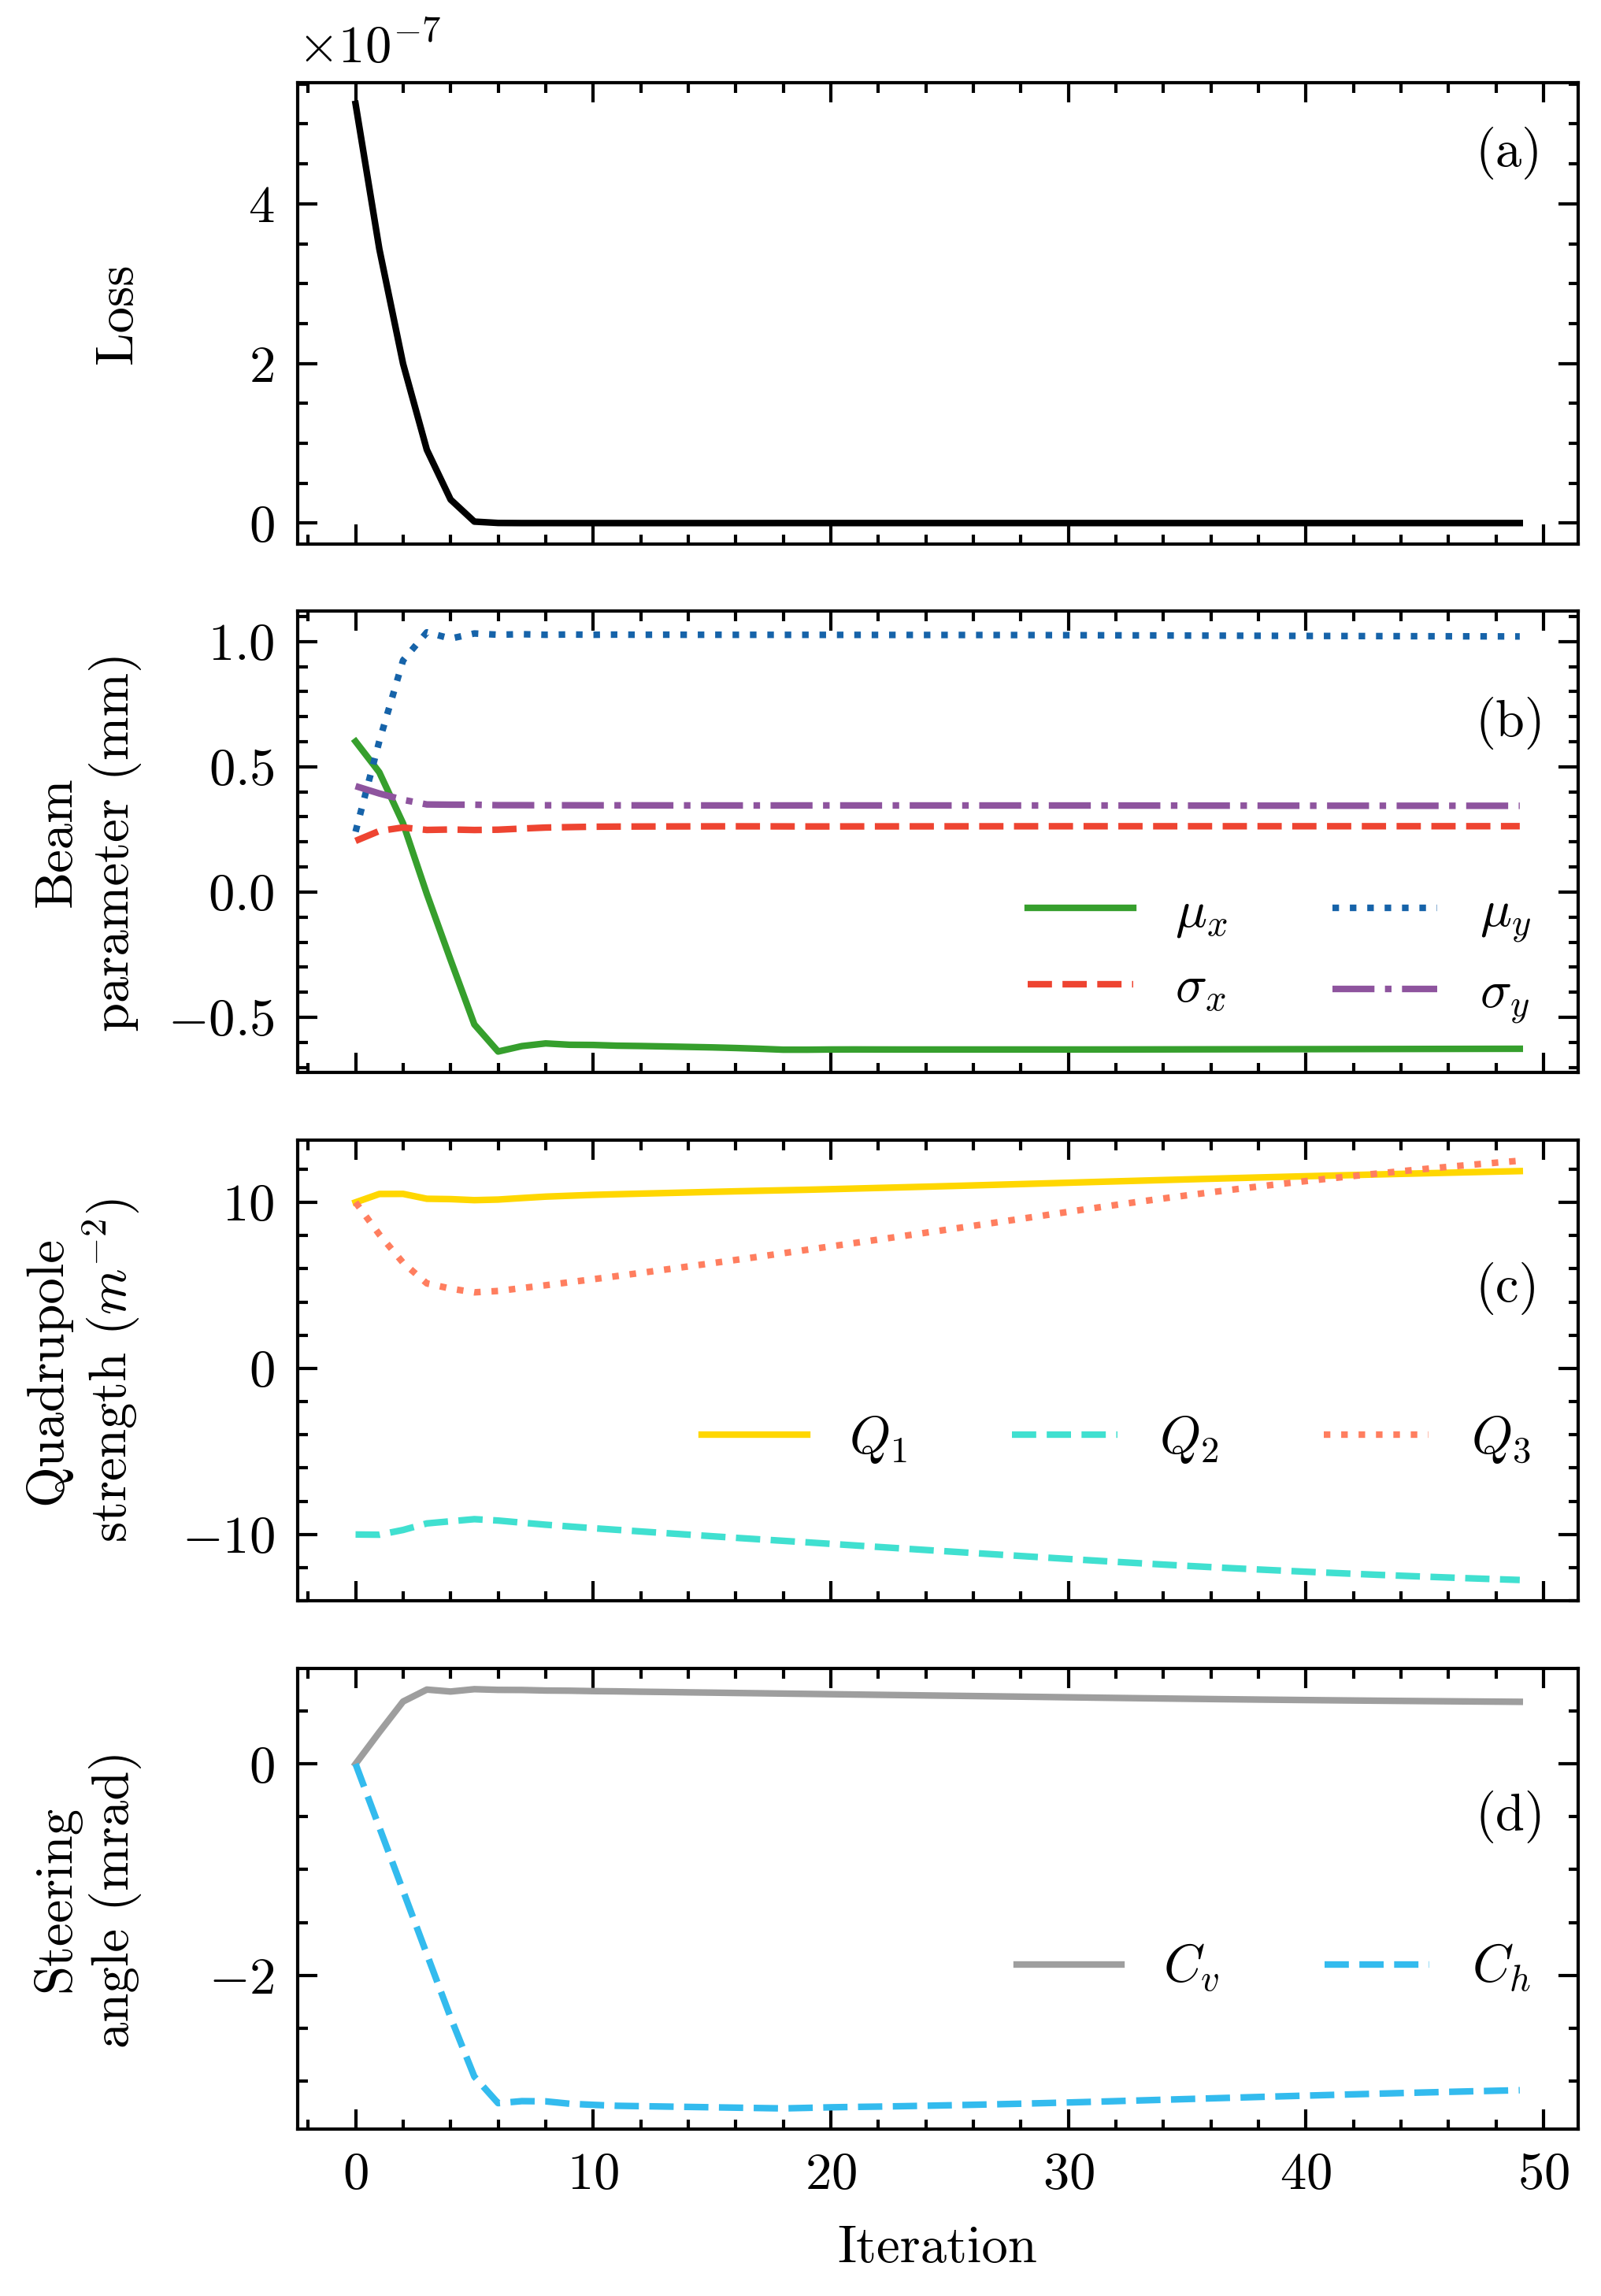

In [28]:
plot_history(history, save_path="reinforcement_learning_example_history.pdf")